This notebook was (heavily) inspired from [PyTorch Documentation](https://pytorch.org/docs/stable/index.html) and [this post](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
).

# PyTorch in practice

## Getting familiar with PyTorch

In [93]:
import numpy as np
import torch

Directly from a list

In [94]:
data: list[list[int]] = [[1, 2],[3, 4]]
x_data: torch.Tensor = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

From a NumPy array

In [95]:
np_array: np.ndarray = np.array(data)
x_np: torch.Tensor = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

From another tensor

In [96]:
x_ones: torch.Tensor = torch.ones_like(x_data)
x_ones

tensor([[1, 1],
        [1, 1]])

In [97]:
x_zeros: torch.Tensor = torch.zeros_like(x_data)
x_zeros

tensor([[0, 0],
        [0, 0]])

In [98]:
x_zeros: torch.Tensor = torch.zeros_like(x_data, dtype=torch.float)
x_zeros

tensor([[0., 0.],
        [0., 0.]])

In [99]:
x_rand: torch.Tensor = torch.rand_like(x_data, dtype=torch.float)
x_rand

tensor([[0.6792, 0.4989],
        [0.0933, 0.3064]])

tensor attributes: shape, dtype, *device*

In [100]:
tensor: torch.Tensor = torch.rand(3,4)

In [101]:
tensor.shape, tensor.dtype, tensor.device

(torch.Size([3, 4]), torch.float32, device(type='cpu'))

Moving to GPU (if possible) (locally: go to PyTorch website to set it up. Ask us if you need help. On Colab: click on `RAM Disk`, top right of Colab, then `Change runtime type`, then select `GPU` in the hardware accelerator dropdown menu). 

Don't sweat it for now, it's mostly useless for small/amateur neural networks. We'll talk about it later... when you'll actually need it.

In [102]:
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
tensor.device

device(type='cuda', index=0)

slicing & concat like in numpy

In [103]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
tensor[2,:] = -1
tensor

tensor([[ 1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.],
        [-1., -1., -1., -1.],
        [ 1.,  0.,  1.,  1.]])

In [104]:
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")  # careful that's a line vector!
print(f"Last column: {tensor[-1, ...]}")  # careful that's a line vector!

First row: tensor([1., 0., 1., 1.])
First column: tensor([ 1.,  1., -1.,  1.])
Last column: tensor([1., 0., 1., 1.])


In [105]:
concatenated_tensor = torch.cat([tensor, tensor, tensor], dim=1)
print(concatenated_tensor)

tensor([[ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.]])


operations on tensors: matrix multiplication, dot product, sum

In [106]:
y1 = tensor @ tensor.T
y1

tensor([[ 3.,  3., -3.,  3.],
        [ 3.,  3., -3.,  3.],
        [-3., -3.,  4., -3.],
        [ 3.,  3., -3.,  3.]])

In [107]:
y2 = tensor.matmul(tensor.T)
y2

tensor([[ 3.,  3., -3.,  3.],
        [ 3.,  3., -3.,  3.],
        [-3., -3.,  4., -3.],
        [ 3.,  3., -3.,  3.]])

In [108]:
z1 = tensor * tensor
z1

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 1., 1., 1.],
        [1., 0., 1., 1.]])

In [109]:
z2 = tensor.mul(tensor)
z2

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 1., 1., 1.],
        [1., 0., 1., 1.]])

In [110]:
tensor.sum()

tensor(5.)

translating back to numpy

In [111]:
t: torch.Tensor = torch.ones(5)
t

tensor([1., 1., 1., 1., 1.])

In [112]:
n: np.ndarray = t.numpy()
n

array([1., 1., 1., 1., 1.], dtype=float32)

What is the added value to using usual numpy arrays? Gradient!

In [113]:
a = torch.randn(5)
x = torch.randn(5, requires_grad=True)
a,x

(tensor([-1.0817,  2.4279,  0.8344,  1.3793,  0.4076]),
 tensor([-0.5070, -1.3864,  0.3249, -1.3803, -0.1548], requires_grad=True))

In [114]:
y = torch.sum(a*x)
y

tensor(-4.5135, grad_fn=<SumBackward0>)

In [115]:
x.grad #no gradient yet

In [116]:
y.backward() # computes gradient

In [117]:
x.grad # gradient

tensor([-1.0817,  2.4279,  0.8344,  1.3793,  0.4076])

In [118]:
try:
    y.backward() # computes gradient again... bug!
except:
    print('error')

error


## Torching a linear regression

linear regression with numpy:

Numpy:   [1.02151009] [1.95402174]
SKlearn: [1.02150962] [1.95402268]


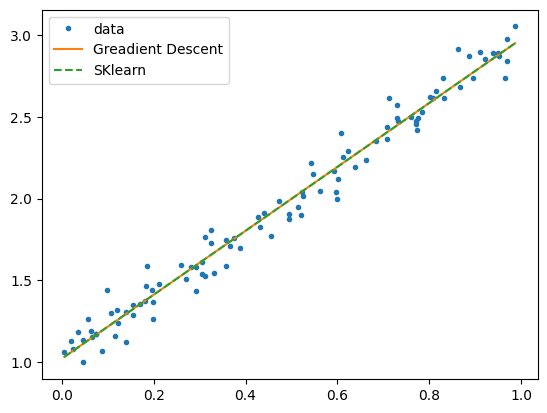

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data Generation
np.random.seed(42)
xs = np.random.rand(100, 1)
ys = 1 + 2 * xs + .1 * np.random.randn(100, 1)
plt.plot(xs, ys, '.', label='data')

np.random.seed(42)
a = np.random.randn(1)  # a + b * xs
b = np.random.randn(1)  # a + b * xs

lr = 1e-1
n_epochs = 1000
for epoch in range(n_epochs):
    # compute our model's predicted output
    yhat = a + b * xs
    
    # compute the error
    error = (ys - yhat)
    # compute the loss (MSE)
    loss = (error ** 2).mean()
    
    # compute gradients for both a and b parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (xs * error).mean()
    
    # update parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
print('Numpy:  ', a, b)
plt.plot([np.min(xs), np.max(xs)], [a+np.min(xs)*b,a+np.max(xs)*b], "-", label='Gradient Descent')


from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(xs, ys)
skl_a = linr.intercept_
skl_b = linr.coef_[0]
plt.plot([np.min(xs), np.max(xs)], [skl_a+np.min(xs)*skl_b,skl_a+np.max(xs)*skl_b], "--", label='SKlearn')
plt.legend()
plt.plot()

print('SKlearn:', skl_a, skl_b)

*(imports)*

In [120]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

best device

In [121]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

transform numpy arrays data to torch tensors (and send to best device)

In [122]:
xs_tensor = torch.from_numpy(xs).float().to(device)
ys_tensor = torch.from_numpy(ys).float().to(device)

In [123]:
type(xs), type(xs_tensor), xs_tensor.type()

(numpy.ndarray, torch.Tensor, 'torch.cuda.FloatTensor')

initialize parameters "a" and "b" randomly; since we want to apply gradient descent on these parameters, set `REQUIRES_GRAD = TRUE`

In [124]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
a,b

(tensor([0.1940], device='cuda:0', requires_grad=True),
 tensor([0.1391], device='cuda:0', requires_grad=True))

update the main gradient descent loop
- use `.backward()` to calculate the gradient
- use `torch.no_grad()` when updating the parameters (else, pytorch will give an error)
- use `.zero_()` to zero out the gradient of $a$ and $b$ after updating them

In [125]:
lr = 1e-1
n_epochs = 1000

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

for epoch in range(n_epochs):
    yhat = a + b * xs_tensor
    error = ys_tensor - yhat
    loss = (error ** 2).mean()
    loss.backward()
    
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad
    a.grad.zero_()
    b.grad.zero_()
    
print(a.item(), b.item())

1.0215120315551758 1.9540181159973145


-----
### Interlude: digging into PyTorch's internal system

We will try to understand this part of the code:
```
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
yhat = a + b * xs_tensor
error = ys_tensor - yhat
loss = (error ** 2).mean()
```
use the `make_dot()` function on `yhat` to see the computational graph PyTorch constructed to get `yhat`

In [126]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
yhat = a + b * xs_tensor
error = ys_tensor - yhat
loss = (error ** 2).mean()

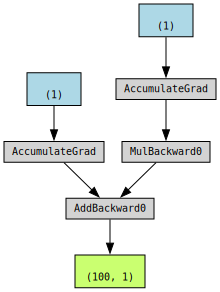

In [127]:
make_dot(yhat)

use the `make_dot()` function again on `error` & `loss`

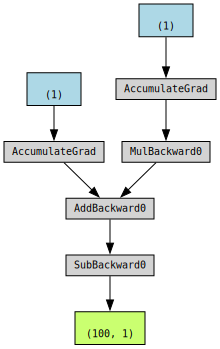

In [128]:
make_dot(error)

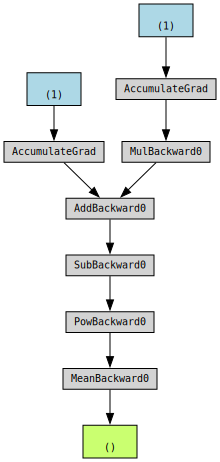

In [129]:
make_dot(loss)

what if we did not need the gradient of `a`? plot the computational graph of pytorch

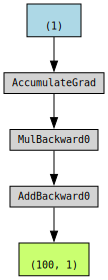

In [130]:
torch.manual_seed(42)
a_nograd = torch.randn(1, requires_grad=False, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
yhat = a_nograd + b * xs_tensor
make_dot(yhat)

add an `if` condition to your loss and check out the graph

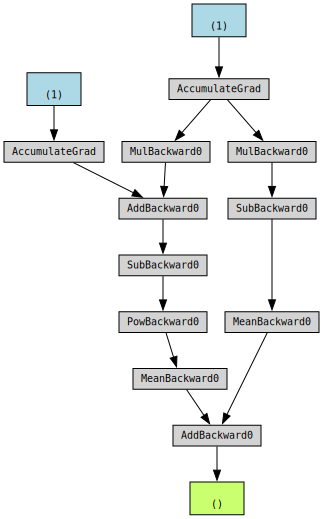

In [131]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
yhat = a + b * xs_tensor
error = ys_tensor - yhat
loss = (error ** 2).mean()

if loss > 0:
    yhat2 = b * xs_tensor
    error2 = ys_tensor - yhat2
    loss += error2.mean()

make_dot(loss)

PyTorch builds the computation graph at runtime, as operations are executed.

Therefore -> only the operations that are actually executed are added to the computation graph.

-----

getting back to the main gradient descent loop, rewrite it using an optimizer (take the SGD for instance)

In [132]:
lr = 1e-1
n_epochs = 1000

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

optimizer = optim.SGD([a, b], lr=lr)
for epoch in range(n_epochs):
    yhat = a + b * xs_tensor
    error = ys_tensor - yhat
    loss = (error ** 2).mean()
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

print(a.item(), b.item())

1.0215120315551758 1.9540181159973145


rewrite the main gradient descent loop using the pytorch MSE instead of computing the loss function yourself

In [133]:
lr = 1e-1
n_epochs = 1000

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * xs_tensor
    loss = loss_fn(ys_tensor, yhat)
    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()

print(a.item(), b.item())

1.0215120315551758 1.9540181159973145


write the linear regression as a `nn.module` class; rewrite the training loop

In [134]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # To make "a" and "b" real parameters of the model, we need to wrap them with nn.Parameter
        self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x):
        # Computes the outputs / predictions
        return self.a + self.b * x

lr = 1e-1
n_epochs = 1000

torch.manual_seed(42)
model = ManualLinearRegression().to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    model.train()
    yhat = model(xs_tensor)
    loss = loss_fn(ys_tensor, yhat)
    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()

print(model.a.item(), model.b.item())

1.0215120315551758 1.9540181159973145


NB: The `.train()` sets the model to training mode. This important for models that use mechanisms which have distinct behaviors in training and evaluation phases (we will talk about it later). Add it to your above code as a good practice.

Create a pytorch dataset & dataloader to load your data
*(this may seem silly since our data is very small, but imagine each piece of data could be an image instead of a pair $(x,y)$: then it would make sence to use such a machinery)*

In [135]:
from torch.utils.data import Dataset, TensorDataset

class CustomDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
        
    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.x)

xs_tensor = torch.from_numpy(xs).float()
ys_tensor = torch.from_numpy(ys).float()

train_data = CustomDataset(xs_tensor, ys_tensor)
train_data[0]

(tensor([0.3745]), tensor([1.7578]))

In [136]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_data, batch_size=4, shuffle=True)
next(iter(train_loader))  # 4x and 4y

[tensor([[0.7710],
         [0.5227],
         [0.2713],
         [0.1560]]),
 tensor([[2.4530],
         [2.0378],
         [1.5105],
         [1.2901]])]

rewrite the training using data from dataloader, do not forget to transfer data from dataloader to device

In [137]:
lr = 1e-1
n_epochs = 1000

xs_tensor = torch.from_numpy(xs).float()
ys_tensor = torch.from_numpy(ys).float()
train_data = CustomDataset(xs_tensor, ys_tensor)
train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)

torch.manual_seed(42)
model = ManualLinearRegression().to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        model.train()
        y_batch_hat = model(x_batch)
        loss = loss_fn(y_batch, y_batch_hat)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

print('a:',float(a), 'b:',float(b))
print(dict(model.state_dict()))

a: 1.0215120315551758 b: 1.9540181159973145
{'a': tensor([1.0265], device='cuda:0'), 'b': tensor([1.9669], device='cuda:0')}


before training, split your dataset between a training and a testing set (80% training, 20% testing); print validation loss every $1/10$ of the epochs

In [138]:
from torch.utils.data.dataset import random_split

lr = 1e-1
n_epochs = 1000

xs_tensor = torch.from_numpy(xs).float()
ys_tensor = torch.from_numpy(ys).float()
dataset = CustomDataset(xs_tensor, ys_tensor)
train_dataset, val_dataset = random_split(dataset, [80, 20])
train_loader = DataLoader(dataset=train_dataset, batch_size=16)
val_loader = DataLoader(dataset=val_dataset, batch_size=10)

torch.manual_seed(42)
model = ManualLinearRegression().to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    model.train()
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        y_batch_hat = model(x_batch)
        loss = loss_fn(y_batch, y_batch_hat)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    model.eval()  # getting out of the training mode,
    # opposite of model.train()
    if epoch % (n_epochs//10) == 0:
        with torch.no_grad():
            for x_val, y_val in val_loader:
                x_val = x_val.to(device)
                y_val = y_val.to(device)
                yhat = model(x_val)
                val_loss = loss_fn(y_val, yhat)
            print(f'epoch: {epoch}/{n_epochs}; val loss: {val_loss}')

print('\na:',float(a), 'b:',float(b))
print(dict(model.state_dict()))

epoch: 0/1000; val loss: 0.16637684404850006
epoch: 100/1000; val loss: 0.008180448785424232
epoch: 200/1000; val loss: 0.008197604678571224
epoch: 300/1000; val loss: 0.008197604678571224
epoch: 400/1000; val loss: 0.008197604678571224
epoch: 500/1000; val loss: 0.008197604678571224
epoch: 600/1000; val loss: 0.008197604678571224
epoch: 700/1000; val loss: 0.008197604678571224
epoch: 800/1000; val loss: 0.008197604678571224
epoch: 900/1000; val loss: 0.008197604678571224

a: 1.0215120315551758 b: 1.9540181159973145
{'a': tensor([1.0196], device='cuda:0'), 'b': tensor([1.9666], device='cuda:0')}
